# **IMPORTS**

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [3]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [4]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [5]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [6]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [7]:
# data path for loading
fd001_train_path= "../data/02_processed/FD001_train.csv"
fd001_test_path=  "../data/02_processed/FD001_test.csv"
fd001_rul_path=   "../data/02_processed/FD001_RUL.csv"

In [8]:
# loading the train dataset
FD001_train= pd.read_csv(fd001_train_path)
FD001_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [9]:
# loading the test dataset
FD001_test= pd.read_csv(fd001_test_path)
FD001_test.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [10]:
# loading the rul for validation
FD001_rul = pd.read_csv(fd001_rul_path)
FD001_rul.head(3)

,true_rul
0,112
1,98
2,69


# **FEATURE ENGINEERING**

---

![sensors_lifecycle_degradation_plot.png](../src/sensors_lifecycle_degradation_plot.png)

We saw before that the sensors are degrading over time, but not all the sensors are degrading at the same rate nor all the sensors are degrading at all. Lets take as example the sensor 14, wich is not degrading but getting a lot of noise.
| **#** | **Dataset Name** | **Description**                     | **Unit**          |
| ----- | ---------------- | ----------------------------------- | ----------------- |
| 1     | T2               | Total temperature at fan inlet      | °R (Rankine)      |
| 2     | T24              | Total temperature at LPC outlet     | °R                |
| 3     | T30              | Total temperature at HPC outlet     | °R                |
| 4     | T50              | Total temperature at LPT outlet     | °R                |
| 5     | P2               | Static pressure at fan inlet        | psia              |
| 6     | P15              | Total pressure in bypass duct       | psia              |
| 7     | P30              | Total pressure at HPC outlet        | psia              |
| 8     | Nf               | Physical fan speed                  | rpm               |
| 9     | Nc               | Physical core speed                 | rpm               |
| 10    | epr              | Engine pressure ratio (P50 / P2)    | — (dimensionless) |
| 11    | Ps30             | Static pressure at HPC outlet       | psia              |
| 12    | phi              | Ratio of fuel flow to Ps30          | pps/psi           |
| 13    | NRf              | Corrected fan speed                 | rpm               |
| 14    | NRc              | Corrected core speed                | rpm               |
| 15    | BPR              | Bypass ratio                        | —                 |
| 16    | farB             | Burner fuel-air ratio               | —                 |
| 17    | htBleed          | Bleed enthalpy                      | —                 |
| 18    | Nf_dmd           | Required fan speed                  | rpm               |
| 19    | PCNfR_dmd        | Required corrected fan speed        | rpm               |
| 20    | W31              | High-pressure turbine coolant bleed | lbm/s             |
| 21    | W32              | Low-pressure turbine coolant bleed  | lbm/s             |




We did it before; droping some columns but onlye knowing they're not correlated at all due to the heatmap we saw before in [the EDA Notebook](01_eda_fd001.ipynb), but we actually don't know why they're not correlated and wich is its importance for the other features and for the tree based models we are gonna use due to their baseline good performance. 

We know that the sensors: `1, 5, 10, 16, 18 and 19` are not related with the lifecycle degradation of the engine, and so far yet, we don't get correlation from it in the heatmap since it doesn't variate at all through the lifecycle of the engine, throught the lifecycle indeed.

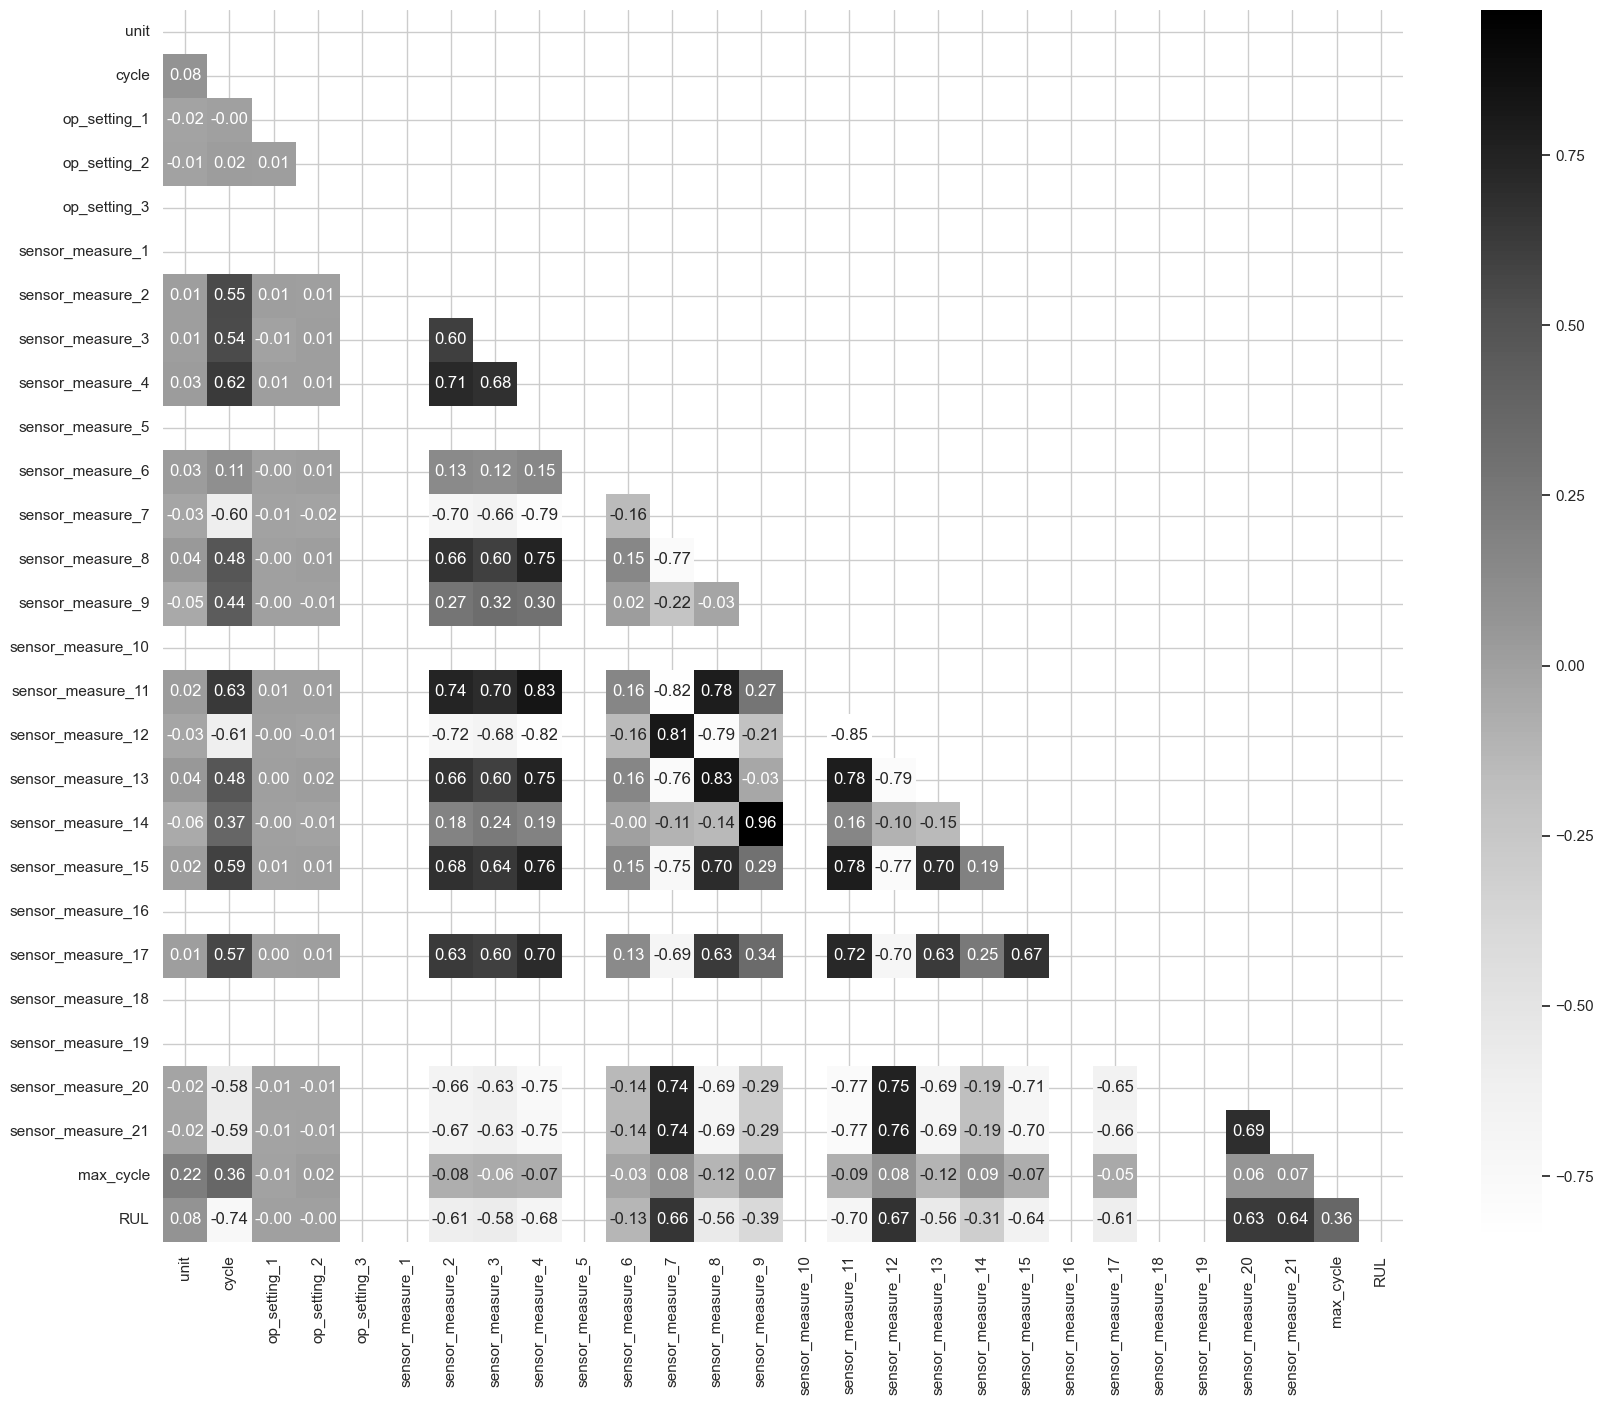

In [28]:
mask= np.zeros_like(FD001_train.corr())
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize= (20,16))
sns.heatmap(FD001_train.corr(), annot= True, fmt= ".2f", cmap= "Greys", mask= mask)
plt.show()

Now we're seeing the entire heatmap, we know is safe to drop them. We'll be dropping the following features: **1, 5, 10, 16, 18, 19**

We also kept the following features: **3, 4, 7, 11, 12, 14, 20, 21, 9, 6** in order to have a more complete picture of the engine and avoid noise; taking only high correlation features and removing the noise.

In [30]:
features = [
  "cycle",             # Essential — Time
  "sensor_measure_3",  # T30 — HPC out temperature
  "sensor_measure_4",  # T50 — EGT proxy
  "sensor_measure_7",  # P30 — HPC out pressure
  "sensor_measure_11", # Ps30 — HPC static pressure
  "sensor_measure_12", # phi — fuel/pressure ratio
  "sensor_measure_14", # NRc — core speed corrected
  "sensor_measure_20", # W31 — HPT cooling bleed
  "sensor_measure_21", # W32 — LPT cooling bleed
  "sensor_measure_9",  # Nc 
  "sensor_measure_6"   # P15 — bypass pressure
]

Degradation is simulated only in the HPC (High-Pressure Compressor) through a progressive loss of:

- **Flow (f):** ability to move air.  
- **Efficiency (e):** ability to compress without losses.  

Both follow an exponential law:

$f(t) = 1 - d_f - e^{a_f t^{b_f}}$

$e(t) = 1 - d_e - e^{a_e t^{b_e}}$

*(Equation 6 from the PDF)*

- Damage is not linear and not locally monotonic (Fig. 5) due to noise/maintenance.  
- The engine is under closed-loop control: the FADEC adjusts fuel and speeds to maintain thrust → sensors reflect secondary effects of the damage, not the direct damage.  

The **failure criterion** is when the Health Index = 0, defined as the minimum of:  

- Stall margin of the Fan, LPC, HPC  
- EGT margin (T48)

# **TRAINING**

---

In [29]:
def train_eval(model, name, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)

  # Model predictions
  y_pred_train= model.predict(X_train)
  y_pred_test=  model.predict(X_test)

  # Metrics on train
  mae_train=  mean_absolute_error(y_train, y_pred_train)
  rmse_train= root_mean_squared_error(y_train, y_pred_train)
  mse_train=  mean_squared_error(y_train, y_pred_train)
  r2_train=   r2_score(y_train, y_pred_train)

  # Metrics on test
  mae_test=  mean_absolute_error(y_test, y_pred_test)
  rmse_test= root_mean_squared_error(y_test, y_pred_test)
  mse_test=  mean_squared_error(y_test, y_pred_test)
  r2_test=   r2_score(y_test, y_pred_test)

  print(f"--- {name} TRAIN ---")
  print("MAE:",  mae_train)
  print("RMSE:", rmse_train)
  print("MSE:",  mse_train)
  print("R2:",   r2_train)

  print(f"\n--- {name} TEST ---")
  print("MAE:",  mae_test)
  print("RMSE:", rmse_test)
  print("MSE:",  mse_test)
  print("R2:",   r2_test)

  # Scatter Test
  plt.figure(figsize=(12, 4))
  plt.scatter(y_test, y_pred_test, color= "black", alpha= .2)
  m, b=   np.polyfit(y_test, y_pred_test, 1)
  plt.plot(y_test, m*y_test + b, color= "red")
  plt.title(f"{name} True vs Predicted (Test set)")
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.grid(True, alpha=0.8)
  plt.show()
  